## Trabalho Prático - Módulo 1 - Ciência de Dados
### reposta do número 1 a 7

In [1]:
# Importando a bibliotecas
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

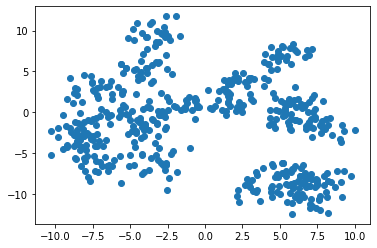

In [3]:
# Criando o dataset
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])
# reposta do número 3

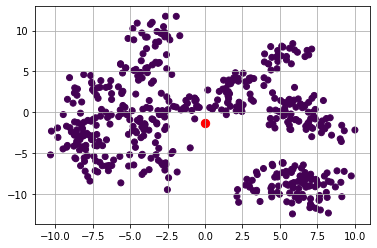

Coordenadas do centroide: [ [0.02618523] ,  [-1.30384304] ]


In [4]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
pred1 = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:,1], c=pred1)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()
print('Coordenadas do centroide: [',kmeans.cluster_centers_[:,0], ', ',kmeans.cluster_centers_[:,1], ']')

In [5]:
# reposta do número 4 Coordenadas do centroide: [ [0.02618523] ,  [-1.30384304] ]

In [6]:
# Econtra-se o melhor número de clusters a partir do algorítimo WCSS - Within-Cluster-Sum-of-Squares
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    
    return distances.index(max(distances)) + 1

In [10]:
# resposta do número 5
print(kmeans.inertia_)

31547.372471390474


In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
# resposta do número 6
print(kmeans.inertia_)

4717.404091931213


número de cluster ideal (resposta do número 7) = 4


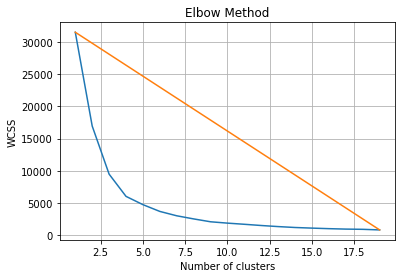

In [14]:
# Através do gráfico podemos confirmar ou não se o nnúmero gerado acima é o melhor
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


print('número de cluster ideal (resposta do número 7) =',optimal_number_of_clusters(wcss))
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('covid_19_data.csv')

In [25]:
df8=df[df['Country/Region'] == 'Mainland China']

In [30]:
df8.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [31]:
index=df8['Last Update'].unique()

In [37]:
Confirmed =[]
Deaths = []
Recovered = []

for  i in range(len(index)):
    Confirmed.append(df8['Confirmed'][df8['Last Update'] == index[i]].sum())
    Deaths.append(df8['Deaths'][df8['Last Update'] == index[i]].sum())
    Recovered.append(df8['Recovered'][df8['Last Update'] == index[i]].sum())

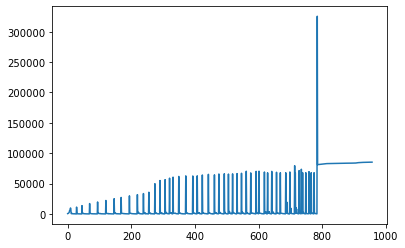

In [38]:
plt.plot(Confirmed)